In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from the specified CSV file into a Pandas DataFrame
df = pd.read_csv('Books_Data_Clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [4]:
df.shape

(1070, 15)

In [5]:
df.sample(3)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
753,753,2010.0,It's Not Summer Without You,Jenny Han,en-US,Excellent,4.14,80367,genre fiction,346.84,0.000,2.99,868,"Amazon Digital Services, Inc.",31536
1028,1028,2012.0,Rapture,Lauren Kate,eng,Excellent,4.03,79360,nonfiction,1282.93,769.758,11.99,1216,Random House LLC,107
20,20,2013.0,Life After Life,Kate Atkinson,eng,Intermediate,3.74,138454,genre fiction,11702.67,0.000,3.99,21,"Amazon Digital Services, Inc.",2933


In [6]:
df.describe().round(2)

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.00,1069.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,534.50,1971.38,4.01,94909.91,1856.62,843.28,4.87,611.65,9676.98
std,309.03,185.08,0.25,31513.24,3936.92,2257.60,3.56,369.85,15370.57
min,0.00,-560.00,2.97,27308.00,104.94,0.00,0.99,1.00,106.00
25%,267.25,1985.00,3.85,70398.00,372.46,0.00,1.99,287.50,551.25
50%,534.50,2003.00,4.01,89309.00,809.74,273.08,3.99,595.50,3924.00
75%,801.75,2010.00,4.17,113906.50,1487.96,721.18,6.99,932.50,5312.25
max,1069.00,2016.00,4.77,206792.00,47795.00,28677.00,33.86,1273.00,61560.00


In [7]:
df = df[df['Publishing Year'] > 1900]

In [8]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [9]:
df.dropna(subset = 'Book Name', inplace = True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

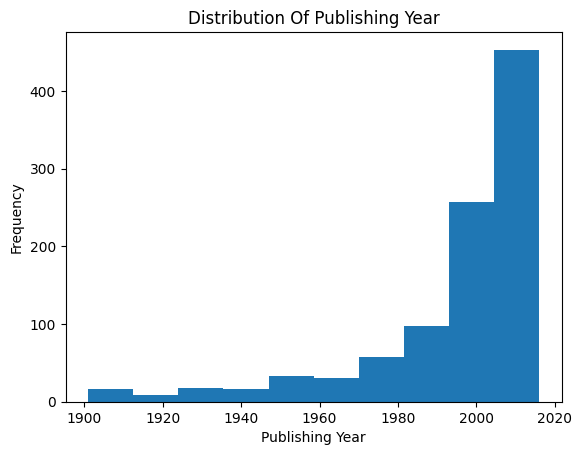

In [12]:
plt.hist(df['Publishing Year'])
plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.title('Distribution Of Publishing Year')
plt.show()

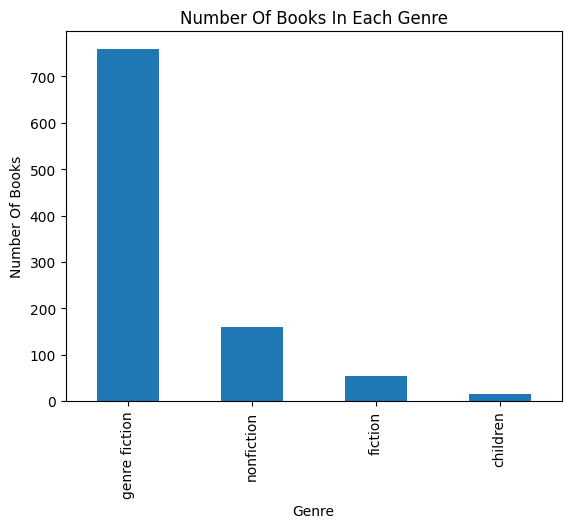

In [13]:
# Generates and displays a bar chart visualizing the frequency distribution of books across different genres.
df['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('Genre')
plt.ylabel('Number Of Books')
plt.title('Number Of Books In Each Genre')
plt.show()

In [14]:
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending = False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

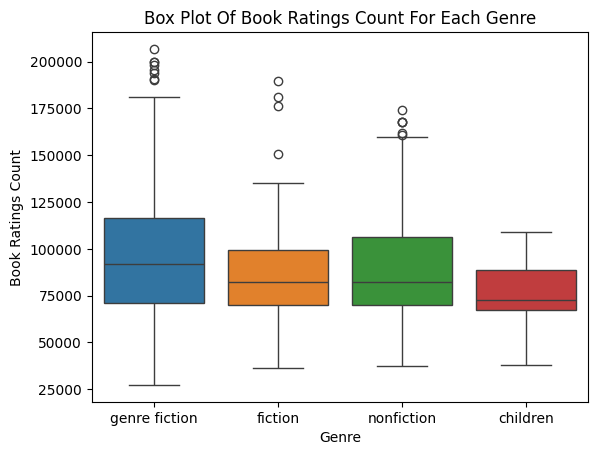

In [15]:
# Generates and displays a box plot to analyze and compare the statistical distribution 
# (median, quartiles, and outliers) of book ratings count for each genre.
sns.boxplot(x = 'genre', y = 'Book_ratings_count', data = df, hue = 'genre')
plt.xlabel('Genre')
plt.ylabel('Book Ratings Count')
plt.title('Box Plot Of Book Ratings Count For Each Genre')
plt.show()

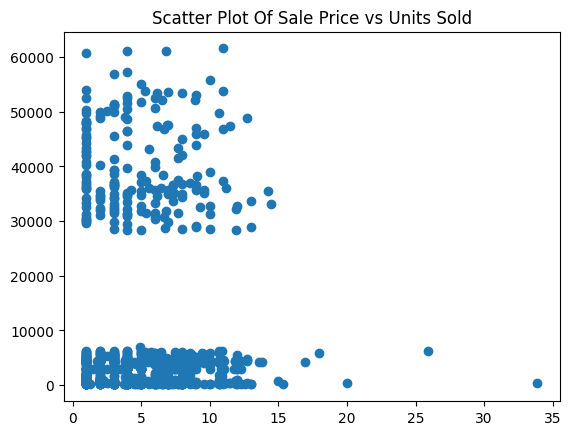

In [16]:
# Generates and displays a scatter plot to visually explore the correlation and relationship between 'sale price' and 'units sold'.
plt.scatter(df['sale price'], df['units sold'])
plt.title('Scatter Plot Of Sale Price vs Units Sold')
plt.show()

In [17]:
language_counts = df['language_code'].value_counts()

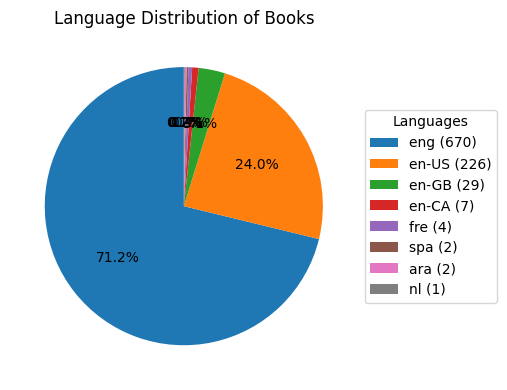

In [18]:
# Creates a figure and generates a pie chart to visualize the proportional distribution of books across different languages in the dataset.
plt.figure(figsize=(8, 4))
wedges, texts, autotexts = plt.pie(language_counts, startangle=90, autopct='%1.1f%%')
plt.title('Language Distribution of Books')

# Remove the labels from the slices (keep only percentages)
for text in texts:
    text.set_text('')

# Create legend with language names and their counts
legend_labels = [f'{label} ({value})' for label, value in zip(language_counts.index, language_counts)]
plt.legend(wedges, legend_labels, title="Languages", loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [19]:
# Calculates the total revenue generated by each distinct publisher and sorts the results 
# in descending order to identify the top-performing publishers by revenue.
df.groupby('Publisher ')['publisher revenue'].sum().sort_values(ascending = False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [20]:
# Calculates the mean number of book ratings (a proxy for engagement/popularity) for each author rating category 
# and ranks them to analyze the correlation between author quality and reader interest.
df.groupby('Author_Rating')['Book_ratings_count'].mean().sort_values(ascending = False)

Author_Rating
Intermediate    101400.272569
Famous           98295.250000
Novice           87318.464286
Excellent        83804.800595
Name: Book_ratings_count, dtype: float64

In [21]:
# Counts the total number of books for each unique language code in the dataset 
# and sorts the results in descending order to identify the primary language compositions of the inventory.
df.groupby('language_code').size().sort_values(ascending = False)

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

In [22]:
# Calculates the maximum number of book ratings (peak engagement) achieved by any single book within each author rating category, 
# and sorts them in descending order to analyze the highest potential books per author tier.
df.groupby('Author_Rating')['Book_ratings_count'].max().sort_values(ascending = False)

Author_Rating
Famous          206792
Intermediate    199872
Excellent       167848
Novice          155903
Name: Book_ratings_count, dtype: int64

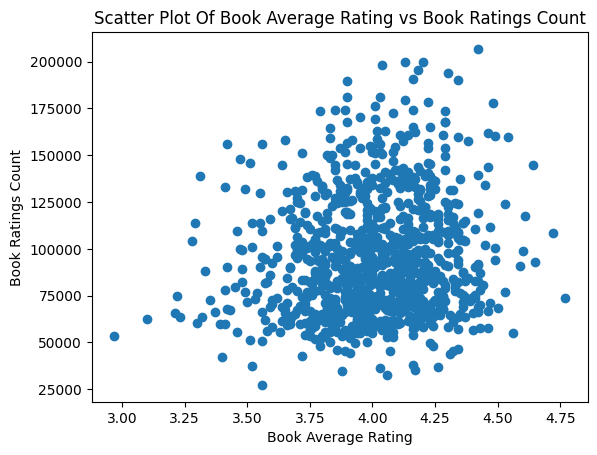

In [23]:
# Generates and displays a scatter plot to visually explore the correlation between a book's average rating (quality) 
# and the total count of its ratings (popularity/engagement).
plt.scatter(df['Book_average_rating'], df['Book_ratings_count'])
plt.xlabel('Book Average Rating')
plt.ylabel('Book Ratings Count')
plt.title('Scatter Plot Of Book Average Rating vs Book Ratings Count')
plt.show()

In [24]:
# Calculates the total 'gross sales' attributed to each unique author in the dataset, 
# storing the result in a variable to analyze author-specific revenue performance.
total_gross_sales_by_author = df.groupby('Author')['gross sales'].sum()

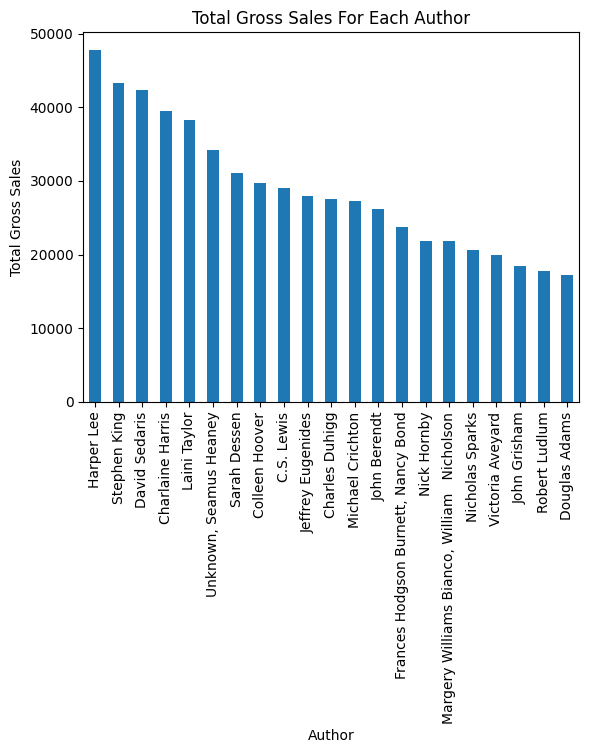

In [25]:
# Sorts the total gross sales by author, selects the top 21 revenue-generating authors, 
# and generates a bar chart to visually display the revenue-based author performance leaderboard.
total_gross_sales_by_author.sort_values(ascending = False).head(21).plot(kind = 'bar')
plt.xlabel('Author')
plt.ylabel('Total Gross Sales')
plt.title('Total Gross Sales For Each Author')
plt.show()

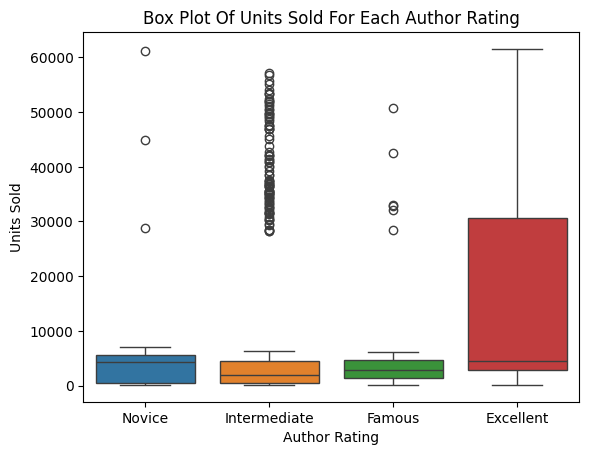

In [26]:
# Generates and displays a box plot to analyze and compare the statistical distribution (median, quartiles, and range) 
# of 'units sold' across different 'Author_Rating' categories to assess sales consistency.
sns.boxplot(x='Author_Rating', y='units sold', data = df, hue = 'Author_Rating')
plt.xlabel('Author Rating')
plt.ylabel('Units Sold')
plt.title('Box Plot Of Units Sold For Each Author Rating')
plt.show()

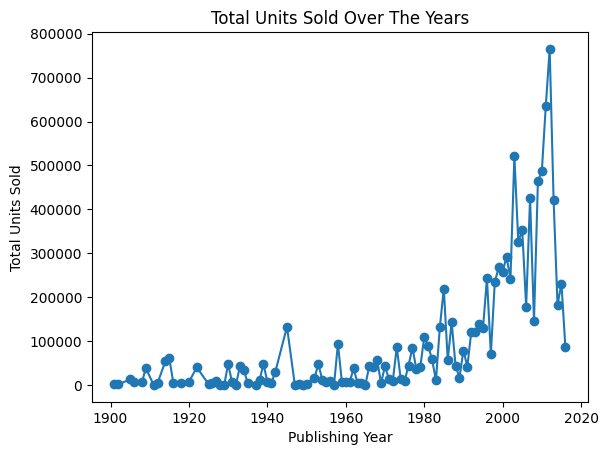

In [27]:
# Aggregates and sums the total units sold by 'Publishing Year' and generates a line plot 
# to visualize the sales trend and performance over time for strategic planning.
df.groupby('Publishing Year')['units sold'].sum().plot(kind = 'line', marker = 'o')
plt.xlabel('Publishing Year')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold Over The Years')
plt.show()